In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pyrosetta import *

pyrosetta.init()

PyRosetta-4 2021 [Rosetta PyRosetta4.conda.mac.cxx11thread.serialization.python37.Release 2021.38+release.4d5a9693c031951766d575fca9286ed34f560779 2021-09-22T20:45:44] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: {0} Checking for fconfig files in pwd and ./rosetta/flags
core.init: {0} Rosetta version: PyRosetta4.conda.mac.cxx11thread.serialization.python37.Release r297 2021.38+release.4d5a9693c03 4d5a9693c031951766d575fca9286ed34f560779 http://www.pyrosetta.org 2021-09-22T20:45:44
core.init: {0} command: PyRosetta -ex1 -ex2aro -database /opt/anaconda3/envs/proteindesign/lib/python3.7/site-packages/pyrosetta/database
basic.random.init_random_generator: {0} 'RNG device' seed mode, using '/dev/urandom', seed=-677632309 seed_offset=0 real_seed=-677632309 thread_index=0
basic.random.init_random_generator: {0} RandomGenerator:init: Normal mode, seed=-677632309 RG_type=mt19937


In [ ]:
####USER DEFINED VARIABLES####

x_state_path = '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/20240516_hinge_metrics/S2_pdbs/cs221_X.pdb'
y_state_path = '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/20240516_hinge_metrics/S2_pdbs/cs221_Y.pdb'
y_state_no_peptide_path = '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/20240516_hinge_metrics/cs221_Y_no_peptide.pdb'

outdir = os.getcwd()

sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks')
####

In [13]:
#score poses
x_pose = pose_from_pdb(x_state_path)
y_pose = pose_from_pdb(y_state_path)
y_no_peptide_pose = pose_from_pdb(y_state_no_peptide_path)

sfxn = get_fa_scorefxn()

x_score = sfxn(x_pose)
y_score = sfxn(y_pose)
y_no_peptide_score = sfxn(y_no_peptide_pose)

print(x_score)
print(y_score)
print(y_no_peptide_score)

core.import_pose.import_pose: {0} File '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/20240516_hinge_metrics/S2_pdbs/cs221_X.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: {0} File '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/20240516_hinge_metrics/S2_pdbs/cs221_Y.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: {0} File '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/20240516_hinge_metrics/cs221_Y_no_peptide.pdb' automatically determined to be of type PDB
core.scoring.ScoreFunctionFactory: {0} SCOREFUNCTION: ref2015
-415.8557624520655
-495.6376974802858
-401.30984353732833


SC more buried X:[5, 8, 12, 27, 30, 31, 34, 39, 42, 43, 44, 46, 50, 54, 57, 60, 76, 77, 80, 82, 88, 92, 119, 122, 123, 124, 130, 131, 134, 140, 146]
SC more buried Y:[18, 20, 21, 23, 25, 28, 37, 59, 62, 63, 66, 69, 70, 73, 79, 81, 84, 85, 96, 98, 100, 101, 104, 108, 115, 127, 143, 144, 147, 151, 153]


Text(0, 0.5, 'Delta SC SASA (X - Y)')

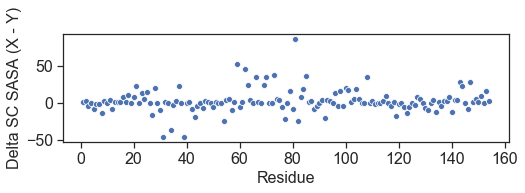

In [91]:
####SC SASA####
#calculate sc sasa
x_pose_sc_sasa = pyrosetta.rosetta.core.scoring.sasa.per_res_sc_sasa(x_pose)
y_pose_sc_sasa = pyrosetta.rosetta.core.scoring.sasa.per_res_sc_sasa(y_pose)

#get sc sasa diff per residue
sasa_diff = np.zeros(len(x_pose_sc_sasa))

for i in range(1, len(x_pose_sc_sasa)+1):
    sasa_diff[i-1] = x_pose_sc_sasa[i] - y_pose_sc_sasa[i]

lower_quartile = np.percentile(sasa_diff, 20)
upper_quartile = np.percentile(sasa_diff, 80)

res_lower_x_sasa = np.where(sasa_diff <= lower_quartile)[0]
res_lower_y_sasa = np.where(sasa_diff >= upper_quartile)[0]

print('SC more buried X:' + str([x+1 for x in res_lower_x_sasa]))
print('SC more buried Y:' + str([x+1 for x in res_lower_y_sasa]))

plt.figure(figsize=(8, 2))
sns.lineplot(x=np.arange(1,len(x_pose_sc_sasa)+1), y=sasa_diff, marker='o', linestyle='')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Residue', fontsize=16)
plt.ylabel('Delta SC SASA (X - Y)', fontsize=16)

     delta sc sasa
1         1.759602
2         2.869981
3        -3.594098
4        -0.167125
5        -7.972571
..             ...
150       0.833073
151       9.219830
152       0.000000
153      16.641381
154       3.071710

[154 rows x 1 columns]
     delta sc sasa
114       2.561717
73       37.419867
61        0.769690
62       46.103144
111      -1.794377
70       34.600803
                    1         2         3         4         5         6    \
delta sc sasa  1.759602  2.869981 -3.594098 -0.167125 -7.972571 -1.794377   

                    7          8         9         10   ...  145       146  \
delta sc sasa -1.233467 -14.365355  2.047023  0.254996  ...  0.0 -8.386656   

                     147       148       149       150      151  152  \
delta sc sasa  28.018507  0.512343  5.893124  0.833073  9.21983  0.0   

                     153      154  
delta sc sasa  16.641381  3.07171  

[1 rows x 154 columns]
(154, 1)


Text(104.0, 0.5, 'Delta SC SASA\n(State X - State Y)\n')

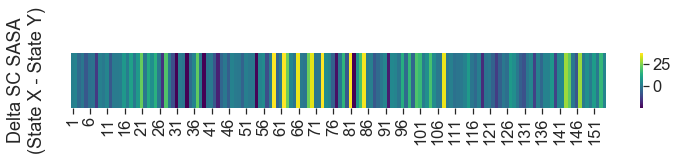

In [125]:
heatmap_df = pd.DataFrame(sasa_diff, columns=['delta sc sasa'])
heatmap_df.index +=1
#heatmap_df['residue_number'] = (np.arange(1,len(x_pose_sc_sasa)+1))
#heatmap_df.reset_index(inplace=True)
print(heatmap_df)
print(heatmap_df.iloc[[113,72,60,61,110,69]])

test_pivot = heatmap_df.T
print(test_pivot)

print(heatmap_df.shape)
plt.figure(figsize=(12, 1))
sns.heatmap(test_pivot, yticklabels=False, cmap='viridis', robust=True)
plt.ylabel('Delta SC SASA\n(State X - State Y)\n')
#sns.heatmap(test_pivot, cmap='viridis', square=True, cbar_kws={'label': 'Delta SC SASA (X - Y)'})
#plt.savefig(f'{outdir}/delta_sc_sasa.png', bbox_inches='tight')


     x pose neighbors diff
1                      0.0
2                      0.0
3                      0.0
4                      0.0
5                      0.0
..                     ...
150                    0.0
151                   -1.0
152                    0.0
153                    1.0
154                    0.0

[154 rows x 1 columns]
     x pose neighbors diff
114                   -2.0
73                    -2.0
61                     0.0
62                     0.0
111                   -1.0
70                    -4.0
                       1    2    3    4    5    6    7    8    9    10   ...  \
x pose neighbors diff  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

                       145  146  147  148  149  150  151  152  153  154  
x pose neighbors diff  0.0  0.0 -1.0  0.0  0.0  0.0 -1.0  0.0  1.0  0.0  

[1 rows x 154 columns]
(154, 1)


Text(104.0, 0.5, 'Delta neighbors\n(State X - State Y)\n')

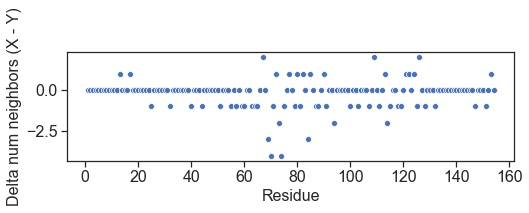

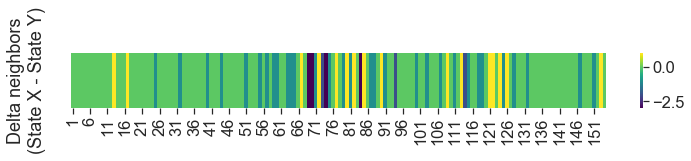

In [128]:
####NEIGHBORS####
#calculate neighbors and get diff per residue
#TODO-CB distance 8 a ngstroms?? --replicate what Deniz did?
#also consider close contact residue selector
#https://docs.rosettacommons.org/docs/latest/application_documentation/Application-Documentation/PerResidueSolventExposure

x_pose_neighbors = np.zeros(len(x_pose.sequence()))
x_pose_neighbors_diff = np.zeros(len(x_pose.sequence()))
y_pose_neighbors_diff = np.zeros(len(y_pose.sequence()))

for i in range(1, len(x_pose.sequence())+1): #use range
    resi_selector = pyrosetta.rosetta.core.select.residue_selector.ResidueIndexSelector()
    resi_selector.set_index(i)

    neighbors_selector = pyrosetta.rosetta.core.select.residue_selector.NeighborhoodResidueSelector()
    neighbors_selector.set_focus_selector(resi_selector)
    neighbors_selector.set_distance(6.0)
    neighbors_selector.set_include_focus_in_subset(False)
    #neighbors_selector.set_atom_names_for_distance_measure('CB')
    
    x_neighbors_vector = neighbors_selector.apply(x_pose)
    # print(x_neighbors_vector)
    x_pose_neighbors[i-1] = np.sum(x_neighbors_vector)
    y_neighbors_vector = neighbors_selector.apply(y_pose)

    x_pose_neighbors_diff[i-1] = np.sum(x_neighbors_vector) - np.sum(y_neighbors_vector)
    y_pose_neighbors_diff[i-1] = np.sum(y_neighbors_vector) - np.sum(x_neighbors_vector)

    # if i == 62:
        # print(x_pose_neighbors_diff)

res_x_fewer_neighbors = np.where(x_pose_neighbors_diff == min(x_pose_neighbors_diff))[0]
# res_x_fewer_neighbors = np.where(x_pose_neighbors_diff <= -1)[0]
res_y_fewer_neighbors = np.where(x_pose_neighbors_diff == max(x_pose_neighbors_diff))[0]

# print('Residues more exposed in X: '+ str([x+1 for x in res_x_fewer_neighbors]))
# print('Residues more exposed in Y: '+ str([x+1 for x in res_y_fewer_neighbors]))

plt.figure(figsize=(8, 2))
sns.lineplot(x=np.arange(1,len(x_pose_neighbors)+1), y=x_pose_neighbors_diff, marker='o', linestyle='')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Residue', fontsize=16)
plt.ylabel('Delta num neighbors (X - Y)', fontsize=16)

heatmap_df = pd.DataFrame(x_pose_neighbors_diff, columns=['x pose neighbors diff'])
heatmap_df.index +=1
#heatmap_df['residue_number'] = (np.arange(1,len(x_pose_sc_sasa)+1))
#heatmap_df.reset_index(inplace=True)
print(heatmap_df)
print(heatmap_df.iloc[[113,72,60,61,110,69]])

test_pivot = heatmap_df.T
print(test_pivot)

print(heatmap_df.shape)
plt.figure(figsize=(12, 1))
sns.heatmap(test_pivot, yticklabels=False, cmap='viridis', robust=True)
plt.ylabel('Delta neighbors\n(State X - State Y)\n')
#plt.savefig(f'{outdir}/delta_neighbors.png', bbox_inches='tight')
####

X neighbors: [22 59 61 63 66]
Y neighbors: [22 59 61 63 65]
2
[69 86]
     x pose neighbors diff ids
1                          0.0
2                          0.0
3                          0.0
4                          0.0
5                          0.0
..                         ...
150                        0.0
151                        1.0
152                        0.0
153                        1.0
154                        0.0

[154 rows x 1 columns]
     x pose neighbors diff ids
114                        4.0
73                         4.0
61                         0.0
62                         2.0
111                        3.0
70                         6.0


Text(104.0, 0.5, 'Number of\nnovel neighbors\n')

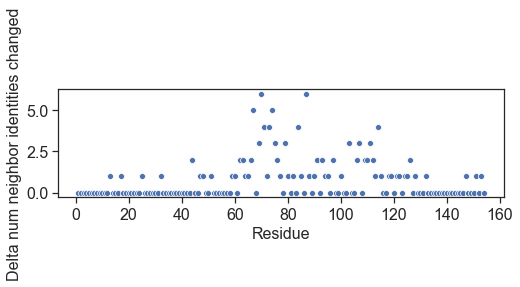

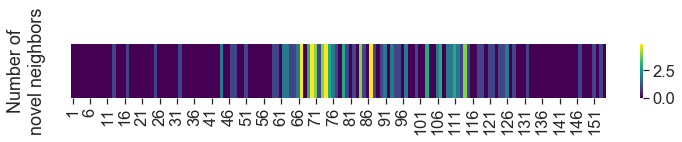

In [129]:
####NEIGHBOR IDENTITIES####
#calculate number of neighbors which change identity for each residue

residue_numbers = np.arange(1, len(x_pose.sequence())+1)
x_pose_neighbor_identities = np.zeros(len(x_pose.sequence()))

for i in range(1, len(x_pose.sequence())+1): #use range
    resi_selector = pyrosetta.rosetta.core.select.residue_selector.ResidueIndexSelector()
    resi_selector.set_index(i)

    neighbors_selector = pyrosetta.rosetta.core.select.residue_selector.NeighborhoodResidueSelector()
    neighbors_selector.set_focus_selector(resi_selector)
    neighbors_selector.set_distance(6.0)
    neighbors_selector.set_include_focus_in_subset(False)
    
    x_neighbors_vector = neighbors_selector.apply(x_pose)
    x_neighbors_array = residue_numbers*x_neighbors_vector
    x_neighbors_residues = x_neighbors_array[x_neighbors_array != 0]

    y_neighbors_vector = neighbors_selector.apply(y_no_peptide_pose)
    y_neighbors_array = residue_numbers*y_neighbors_vector
    y_neighbors_residues = y_neighbors_array[y_neighbors_array != 0]

    neighbor_identities_diff = np.concatenate((np.setdiff1d(x_neighbors_residues, y_neighbors_residues), 
                                               np.setdiff1d(y_neighbors_residues, x_neighbors_residues)), axis=None)
    
    x_pose_neighbor_identities[i-1] = len(neighbor_identities_diff)

    # if i ==5:
    #     # print(x_neighbors_vector*1)
    #     print(x_neighbors_vector)
    #     print(residue_numbers*x_neighbors_vector)
    #     print(np.flatnonzero(residue_numbers*x_neighbors_vector))
    #     new_array = residue_numbers*x_neighbors_vector
    #     print(new_array[new_array != 0])
    #     print(x_neighbors_residues)
    #     print(x_neighbors_vector[1])
    #     print(residue_numbers[0])
    if i ==62:
        print('X neighbors: '+ str(x_neighbors_residues))
        print('Y neighbors: '+ str(y_neighbors_residues))
        print(len(neighbor_identities_diff))
    else:
        pass

print(np.where(x_pose_neighbor_identities == max(x_pose_neighbor_identities))[0])

plt.figure(figsize=(8, 2))
sns.lineplot(x=np.arange(1,len(x_pose_neighbors)+1), y=x_pose_neighbor_identities, marker='o', linestyle='')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Residue', fontsize=16)
plt.ylabel('Delta num neighbor identities changed', fontsize=16)

heatmap_df = pd.DataFrame(x_pose_neighbor_identities, columns=['x pose neighbors diff ids'])
heatmap_df.index +=1
#heatmap_df['residue_number'] = (np.arange(1,len(x_pose_sc_sasa)+1))
#heatmap_df.reset_index(inplace=True)
print(heatmap_df)
print(heatmap_df.iloc[[113,72,60,61,110,69]])

test_pivot = heatmap_df.T

plt.figure(figsize=(12, 1))
sns.heatmap(test_pivot, yticklabels=False, cmap='viridis', robust=True)
plt.ylabel('Number of\nnovel neighbors\n')
#plt.savefig(f'{outdir}/delta_neighbor_identities.png', bbox_inches='tight')
